In [2]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Доверительные интервалы

#### Посчитать ДИ уровня доверия 95% и 99% для следующих данных



In [3]:
# загружаем датасет Бостон
data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
cr = df.iloc[:, 2:6].corr()


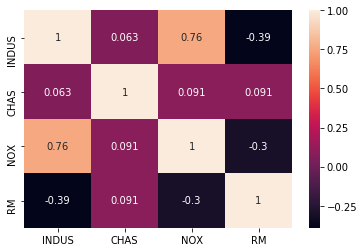

In [5]:
sns.heatmap(cr, annot=True,
            xticklabels=cr.columns.values,
            yticklabels=cr.columns.values)


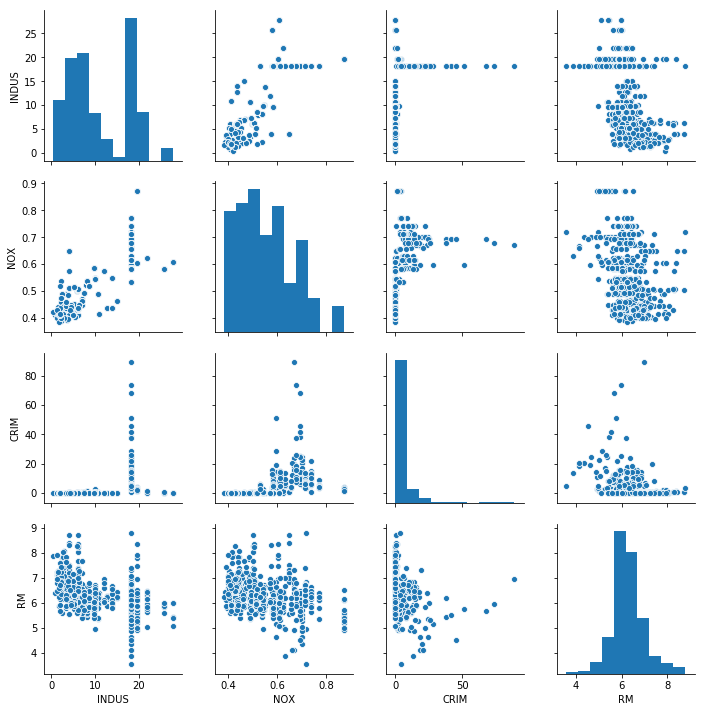

In [5]:
sns.pairplot(df, vars=['INDUS', 'NOX', 'CRIM', 'RM'])

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Посчитать статистики $\bar{X}, s^2, \mu, MODE, X_{0.75} - X_{0.25}$

In [8]:
x = df['RM']

Text(0.5,0,'$x$')

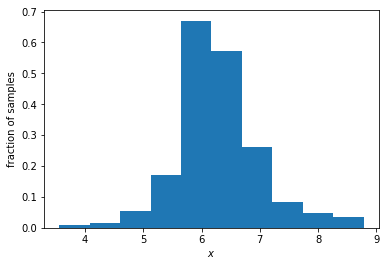

In [9]:
plt.hist(x, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

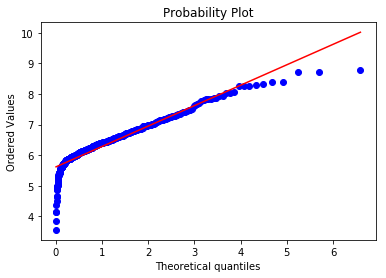

In [11]:
res = stats.probplot(x, dist=stats.expon, plot=plt)


Text(0.5,0,'$x$')

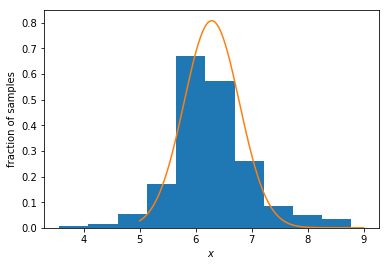

In [12]:
sp =np.linspace(5, 9, 200)
pdf = stats.norm(x.mean(), x.var()).pdf(sp)
plt.hist(x, density=True)
plt.plot(sp, pdf)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')


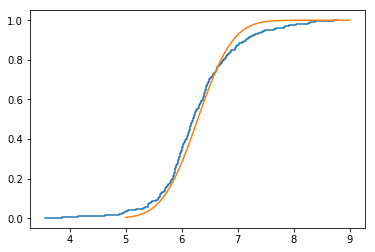

In [23]:
cdf = stats.norm(x.mean(), x.var()).cdf(sp)
ecdf = ECDF(x)
plt.step(ecdf.x, ecdf.y, label='ECDF')
plt.plot(sp, cdf)